## A Visual Analytics Approach for Anomaly Detection from a Novel Traffic Light Data

Cyber attacks on traffic signals is a great threat to national
security and local economies. If multiple traffic signals are compromised there could be great economic impact, crippling at least
a portion of a city. 

## Description for main column:
1. Timestamp : epoch time until milliseconds
2. CurrentIndication_MajorStreet : this column indicates the signal state of major street. 1 = 
red, 3 = green, 4=yellow
3. Duration_Indication_MajorStreet : This column is the number of seconds (given to two 
decimal places) that the signal has been in the current state for major street.
4. CurrentIndication_MinorStreet: this column indicates the signal state of minor street. 1 = 
red, 3 = green, 4=yellow
5. Duration_Indication_MinorStreet : This column is the number of seconds (given to two 
decimal places) that the signal has been in the current state for minor street

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("traffic data.csv")

In [3]:
df

,Timestamp,Phase_Ring1,CumulativeCurrentState1,Phase_Ring2,CumulativeCurrentState2,CumulativeTime1,CurrentIndication_MajorStreet,Duration_Indication_MajorStreet,CumulativeTime2,CurrentIndication_MinorStreet,...,CumulativePhaseCheck1,PhaseCheck2,CumulativePhaseCheck2,CumulativeTime3,Duration_Indication_MinorStreet2,Timeremaining_Phase_Ring1,Timeremaining_Phase_Ring2,CumulativeGreenRing1,CumulativeGreenRing2,RSE_Number
0,1425321066,2,35.37,6,35.37,35.37,3,35.37,35.37,1,...,35.37,3,35.37,35.37,35.37,0.0,0.0,35.37,35.37,RSE25
1,1425321067,2,36.39,6,36.39,36.39,3,36.39,36.39,1,...,36.39,3,36.39,36.39,36.39,0.0,0.0,36.39,36.39,RSE25
2,1425321068,2,37.39,6,37.39,37.39,3,37.39,37.39,1,...,37.39,3,37.39,37.39,37.39,0.0,0.0,37.39,37.39,RSE25
3,1425321069,2,38.40,6,38.40,38.40,3,38.40,38.40,1,...,38.40,3,38.40,38.40,38.40,0.0,0.0,38.40,38.40,RSE25
4,1425321070,2,39.41,6,39.41,39.41,3,39.41,39.41,1,...,39.41,3,39.41,39.41,39.41,0.0,0.0,39.41,39.41,RSE25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196136,1425427498,1,2.13,5,2.13,2.13,1,53.98,41.39,1,...,2.13,1,53.98,40.20,5.47,0.0,0.0,2.13,2.13,RSE25
196137,1425427498,1,2.26,5,2.25,2.26,1,54.11,41.52,1,...,2.25,1,54.11,40.33,5.60,0.0,0.0,2.26,2.25,RSE25
196138,1425427498,1,2.39,5,2.39,2.39,1,54.25,41.66,1,...,2.39,1,54.25,40.46,5.74,0.0,0.0,2.39,2.39,RSE25
196139,1425427498,1,2.52,5,2.52,2.52,1,54.38,41.79,1,...,2.52,1,54.38,40.59,5.87,0.0,0.0,2.52,2.52,RSE25


In [4]:
df.describe()

,Timestamp,Phase_Ring1,CumulativeCurrentState1,Phase_Ring2,CumulativeCurrentState2,CumulativeTime1,CurrentIndication_MajorStreet,Duration_Indication_MajorStreet,CumulativeTime2,CurrentIndication_MinorStreet,...,PhaseCheck1,CumulativePhaseCheck1,PhaseCheck2,CumulativePhaseCheck2,CumulativeTime3,Duration_Indication_MinorStreet2,Timeremaining_Phase_Ring1,Timeremaining_Phase_Ring2,CumulativeGreenRing1,CumulativeGreenRing2
count,1.961410e+05,196141.000000,196141.000000,196141.000000,196141.000000,196141.00000,196141.000000,196141.000000,196141.000000,196141.000000,...,196141.000000,196141.000000,196141.000000,196141.000000,196141.000000,196141.000000,196141.000000,196141.000000,196141.000000,196141.000000
mean,1.425376e+09,2.760173,13.897140,6.624082,10.949543,73.00427,1.859290,24.892364,190.228456,1.790773,...,1.370555,42.646383,1.715246,27.214974,83.601912,28.457030,0.561037,0.575493,13.600719,10.629355
std,4.360785e+04,1.107371,12.895245,1.137752,10.642525,77.83381,1.053812,18.462550,183.380426,1.037351,...,0.829514,37.022208,1.024314,21.168313,88.581418,22.964285,1.471231,1.471317,13.182652,10.930123
min,1.425321e+09,1.000000,0.000000,5.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.425333e+09,2.000000,2.640000,6.000000,2.270000,20.25000,1.000000,9.640000,56.890000,1.000000,...,1.000000,12.620000,1.000000,9.740000,22.170000,9.960000,0.000000,0.000000,1.600000,0.810000
50%,1.425341e+09,2.000000,10.130000,6.000000,7.770000,53.47000,1.000000,21.930000,137.220000,1.000000,...,1.000000,35.470000,1.000000,22.710000,56.860000,23.380000,0.000000,0.000000,10.130000,7.770000
75%,1.425420e+09,4.000000,22.590000,8.000000,16.610000,93.96000,3.000000,36.490000,271.890000,3.000000,...,1.000000,63.040000,3.000000,40.670000,107.030000,42.790000,0.000000,0.000000,22.590000,16.610000
max,1.425427e+09,4.000000,71.690000,8.000000,71.690000,648.06000,4.000000,100.300000,1167.660000,4.000000,...,4.000000,248.190000,4.000000,112.300000,572.440000,187.570000,7.000000,7.000000,71.690000,71.690000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196141 entries, 0 to 196140
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Timestamp                         196141 non-null  int64  
 1   Phase_Ring1                       196141 non-null  int64  
 2   CumulativeCurrentState1           196141 non-null  float64
 3   Phase_Ring2                       196141 non-null  int64  
 4   CumulativeCurrentState2           196141 non-null  float64
 5   CumulativeTime1                   196141 non-null  float64
 6   CurrentIndication_MajorStreet     196141 non-null  int64  
 7   Duration_Indication_MajorStreet   196141 non-null  float64
 8   CumulativeTime2                   196141 non-null  float64
 9   CurrentIndication_MinorStreet     196141 non-null  int64  
 10  Duration_Indication_MinorStreet   196141 non-null  float64
 11  PhaseCheck1                       196141 non-null  i

In [6]:
df["CurrentIndication_MajorStreet"].unique()

array([3, 4, 1], dtype=int64)

1 = red, 3 = green, 4=yellow

In [7]:
df["RSE_Number"].unique()

array(['RSE25'], dtype=object)

# Convert epoch time to human-readable date

In [8]:
import time
def cv_t(date):
    readable_date=time.strftime("%a, %d %b %Y %H", time.localtime(date))
    #convert into hrs instead of sec for better usage
    return (readable_date)

In [9]:
df['Timestamp_r']=df['Timestamp'].apply(lambda x:cv_t(x))

In [10]:
df['Timestamp_r']

0         Mon, 02 Mar 2015 20
1         Mon, 02 Mar 2015 20
2         Mon, 02 Mar 2015 20
3         Mon, 02 Mar 2015 20
4         Mon, 02 Mar 2015 20
                 ...         
196136    Wed, 04 Mar 2015 02
196137    Wed, 04 Mar 2015 02
196138    Wed, 04 Mar 2015 02
196139    Wed, 04 Mar 2015 02
196140    Wed, 04 Mar 2015 02
Name: Timestamp_r, Length: 196141, dtype: object

In [11]:
df_plot = df.groupby(['CurrentIndication_MajorStreet','Timestamp_r']).size().reset_index().pivot(columns='CurrentIndication_MajorStreet', index='Timestamp_r', values=0)
df_minplot = df.groupby(['CurrentIndication_MinorStreet','Timestamp_r']).size().reset_index().pivot(columns='CurrentIndication_MinorStreet', index='Timestamp_r', values=0)

In [12]:
df_plot[1]

Timestamp_r
Mon, 02 Mar 2015 20     7074
Mon, 02 Mar 2015 22     7482
Mon, 02 Mar 2015 23    15057
Tue, 03 Mar 2015 00    13974
Tue, 03 Mar 2015 01    13434
Tue, 03 Mar 2015 02     1856
Tue, 03 Mar 2015 21     3079
Tue, 03 Mar 2015 22    13413
Tue, 03 Mar 2015 23    12831
Wed, 04 Mar 2015 00    14131
Wed, 04 Mar 2015 01    12576
Wed, 04 Mar 2015 02     1223
Name: 1, dtype: int64

In [30]:
from matplotlib.colors import ListedColormap
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)
    colors=['Purples', 'Blues', 'Greens']
    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      colormap= ListedColormap(["red", "green", "yellow"]),
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe


<AxesSubplot:title={'center':'multiple stacked bar plot'}, xlabel='Timestamp_r'>

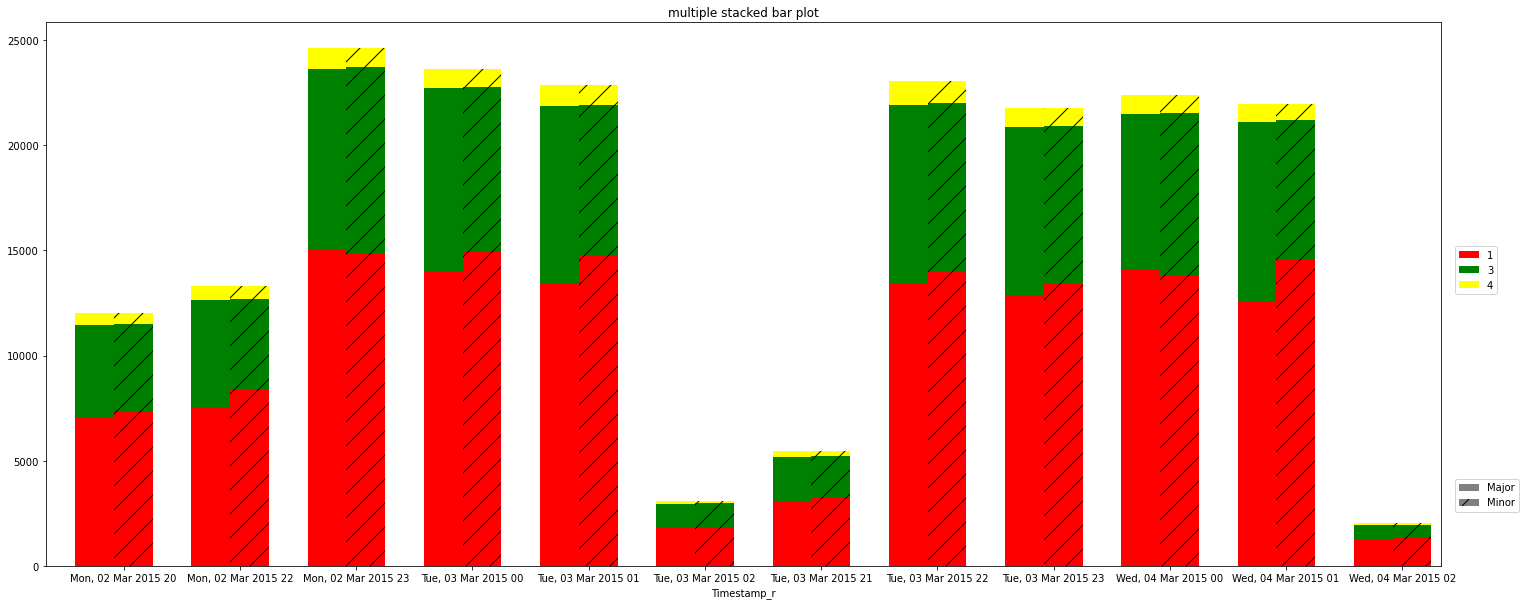

In [32]:
plt.figure(figsize=(25,10))
plot_clustered_stacked([df_plot, df_minplot],
                       ["Major", "Minor"])


Red light time is
longer than the Green light time for both the Major and Minor streets.<br>
While yellow is too short for both.

<ipython-input-15-d2e1560e4968>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_min["ss_group"]=ss_labels
C:\Users\mostafa ahmed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ss_group', ylabel='count'>

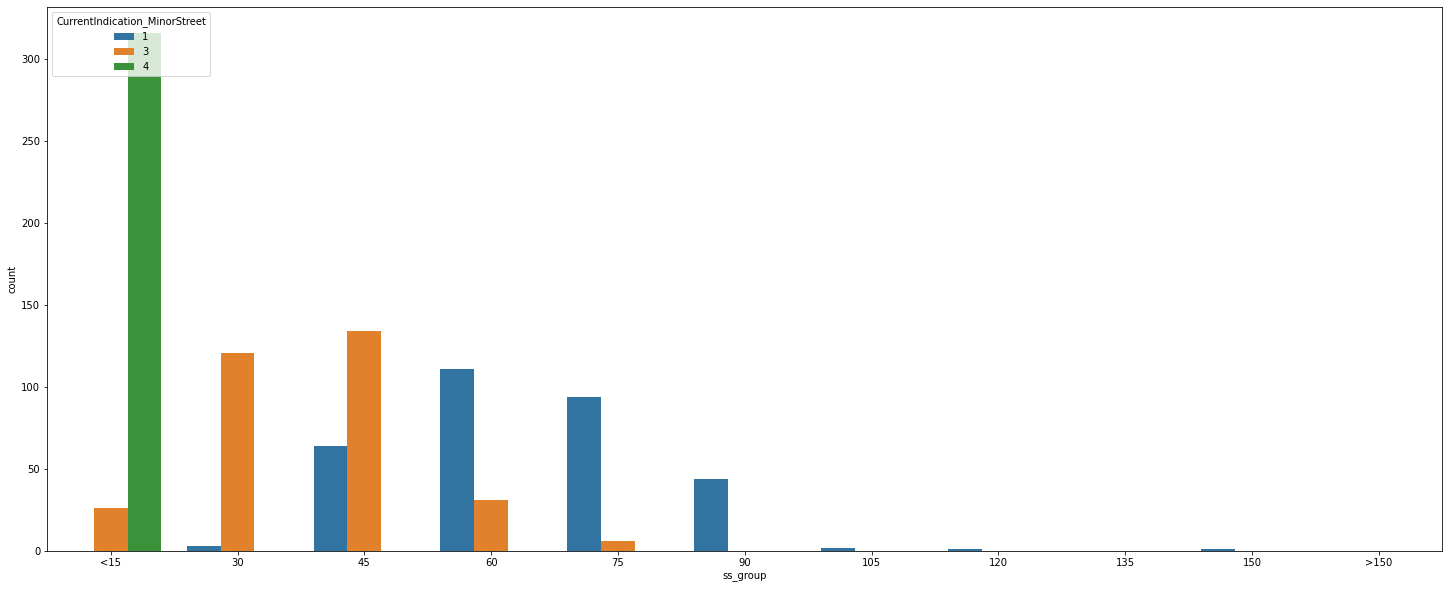

In [15]:
plt.figure(figsize=(25,10))

df_d_min=df.iloc[(df[df["Duration_Indication_MinorStreet"]==0].index)-1]
cut_grades = ["<15","30", '45', '60','75','90','105','120','135','150','>150']
cut_bins =[ 0,15,30, 45,60,75,90,105,120,135,150,160]
ss_labels=pd.cut(df_d_min["Duration_Indication_MinorStreet"], bins=cut_bins, labels = cut_grades,include_lowest=False)
df_d_min["ss_group"]=ss_labels
sns.countplot(df_d_min["ss_group"],hue=df_d_min["CurrentIndication_MinorStreet"])


<ipython-input-16-35e3a15a170c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_maj["ss_group"]=ss_labels
C:\Users\mostafa ahmed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ss_group', ylabel='count'>

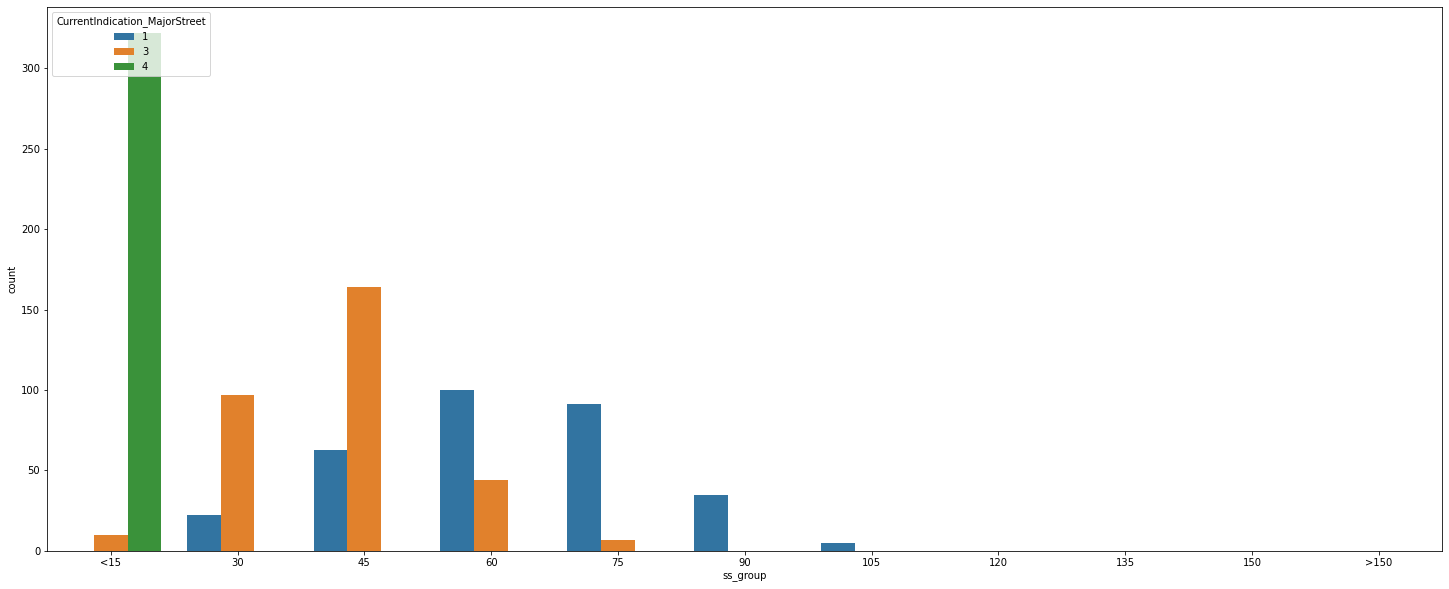

In [16]:
plt.figure(figsize=(25,10))
df_d_maj=df.iloc[(df[df["Duration_Indication_MajorStreet"]==0].index)-1]
cut_grades = ["<15","30", '45', '60','75','90','105','120','135','150','>150']
cut_bins =[ 0,15,30, 45,60,75,90,105,120,135,150,160]
ss_labels=pd.cut(df_d_maj["Duration_Indication_MajorStreet"], bins=cut_bins, labels = cut_grades,include_lowest=False)
df_d_maj["ss_group"]=ss_labels
sns.countplot(df_d_maj["ss_group"],hue=df_d_maj["CurrentIndication_MajorStreet"])

-With consideration of the distribution of the times for light
we can see yellow is meanly lower than 5 sec.

-The time spent in Red and Green states for the Major and Minor
roads is nearly equal.

# Normalized scatter plot

# Total cycle time.
Next we look at the  total cycle time.constant, or, has a certain pattern over time, and if there are deviations from the pattern.<br>
Any of the attack methods may be detected
here if the normal function of the traffic signal is a regular pattern,
but we are mostly looking for Signal Attacks.

### firstly collect(red,green,yellow) lights in same cycle in the same raw for both  minor and mijor


In [17]:
d_min=df_d_min[df_d_min["CurrentIndication_MinorStreet"]==1]

In [18]:
d_mn=d_min[:316]
g=df_d_min[df_d_min["CurrentIndication_MinorStreet"]==3]["Duration_Indication_MinorStreet"]
g=pd.DataFrame(g)[:316]
g.index=d_mn.index


In [19]:
d_mn["green"]=g
d_mn["red"]=df_d_min[df_d_min["CurrentIndication_MinorStreet"]==1]["Duration_Indication_MinorStreet"]
y=df_d_min[df_d_min["CurrentIndication_MinorStreet"]==4]["Duration_Indication_MinorStreet"]
y.index=d_mn.index
d_mn["yellow"]=g

<ipython-input-19-92b90ff2dd55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_mn["green"]=g
<ipython-input-19-92b90ff2dd55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_mn["red"]=df_d_min[df_d_min["CurrentIndication_MinorStreet"]==1]["Duration_Indication_MinorStreet"]
<ipython-input-19-92b90ff2dd55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [20]:
d_maj=df_d_maj[df_d_maj["CurrentIndication_MajorStreet"]==1]
d_mj=d_maj[:316]

g=df_d_maj[df_d_maj["CurrentIndication_MajorStreet"]==3]["Duration_Indication_MajorStreet"]
g=pd.DataFrame(g)[:316]
g.index=d_mj.index


d_mj["green"]=g
d_mj["red"]=df_d_maj[df_d_maj["CurrentIndication_MajorStreet"]==1]["Duration_Indication_MajorStreet"]
y=df_d_maj[df_d_maj["CurrentIndication_MajorStreet"]==4]["Duration_Indication_MajorStreet"][:316]
y.index=d_mj.index
d_mj["yellow"]=g

<ipython-input-20-85cd4afeec1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_mj["green"]=g
<ipython-input-20-85cd4afeec1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_mj["red"]=df_d_maj[df_d_maj["CurrentIndication_MajorStreet"]==1]["Duration_Indication_MajorStreet"]
<ipython-input-20-85cd4afeec1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

<AxesSubplot:xlabel='red', ylabel='green'>

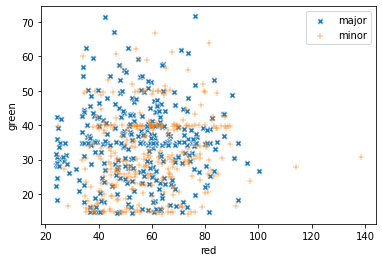

In [21]:
import matplotlib
sns.scatterplot(x=d_mj["red"],y=d_mj["green"],label="major",marker="X")
sns.scatterplot(x=d_mn["red"],y=d_mn["green"],label="minor",marker="+")

<AxesSubplot:xlabel='red', ylabel='green'>

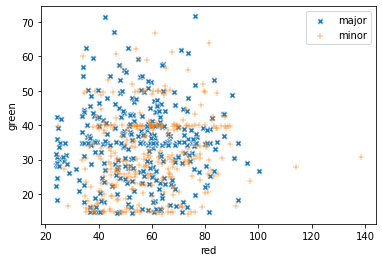

In [22]:
import matplotlib
sns.scatterplot(x=d_mj["red"],y=d_mj["green"],label="major",marker="X")
sns.scatterplot(x=d_mn["red"],y=d_mn["green"],label="minor",marker="+")

#### Normalization

In [23]:
d_mn["n_red"]=d_mn["red"]/(d_mn["red"]+d_mn["green"]+d_mn["yellow"])
d_mn["n_green"]=d_mn["green"]/(d_mn["red"]+d_mn["green"]+d_mn["yellow"])
d_mj["n_red"]=d_mj["red"]/(d_mj["red"]+d_mj["green"]+d_mj["yellow"])
d_mj["n_green"]=d_mj["green"]/(d_mj["red"]+d_mj["green"]+d_mj["yellow"])

<ipython-input-23-e09491c07c3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_mn["n_red"]=d_mn["red"]/(d_mn["red"]+d_mn["green"]+d_mn["yellow"])
<ipython-input-23-e09491c07c3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_mn["n_green"]=d_mn["green"]/(d_mn["red"]+d_mn["green"]+d_mn["yellow"])
<ipython-input-23-e09491c07c3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<AxesSubplot:xlabel='n_red', ylabel='n_green'>

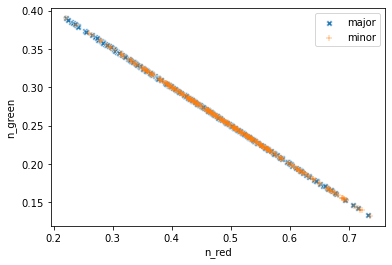

In [24]:
import matplotlib
sns.scatterplot(x=d_mj["n_red"],y=d_mj["n_green"],label="major",marker="X")
sns.scatterplot(x=d_mn["n_red"],y=d_mn["n_green"],label="minor",marker="+")


We now see no points outside of the main point cloud. These are labeled
“Cleaned”

# Comparison of Major and Minor Street Signals fo

<AxesSubplot:xlabel='Timestamp', ylabel='Duration_Indication_MajorStreet'>

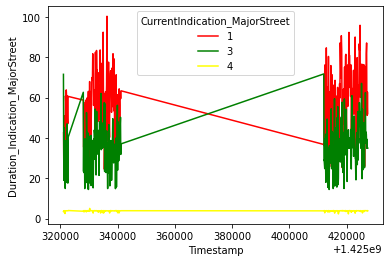

In [25]:
sns.lineplot(x=df_d_maj["Timestamp"],y=df_d_maj["Duration_Indication_MajorStreet"],hue=df_d_maj["CurrentIndication_MajorStreet"],palette=["red","green","yellow"])

<AxesSubplot:xlabel='Timestamp', ylabel='Duration_Indication_MinorStreet'>

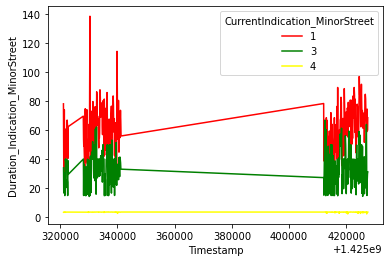

In [26]:
sns.lineplot(x=df_d_min["Timestamp"],y=df_d_min["Duration_Indication_MinorStreet"],hue=df_d_min["CurrentIndication_MinorStreet"],palette=["red","green","yellow"])

They have a very short Green light for the Major and minor road.<br>
we can see anomly in red light with duration up two 140.<br>
we need more details from original data to know the reason of the anomly .

<AxesSubplot:xlabel='Timestamp', ylabel='Duration_Indication_MinorStreet'>

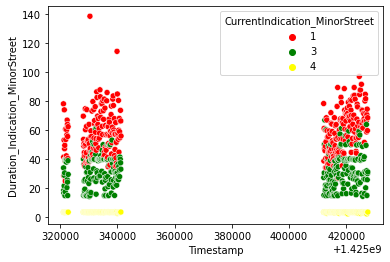

In [27]:
sns.scatterplot(x=df_d_min["Timestamp"],y=df_d_min["Duration_Indication_MinorStreet"],hue=df_d_min["CurrentIndication_MinorStreet"],palette=["red","green","yellow"])

-this two anomly points became more clear

<AxesSubplot:xlabel='ss_group', ylabel='Duration_Indication_MinorStreet'>

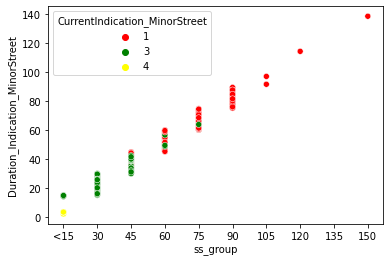

In [28]:
sns.scatterplot(x=df_d_min["ss_group"],y=df_d_min["Duration_Indication_MinorStreet"],hue=df_d_min["CurrentIndication_MinorStreet"],palette=["red","green","yellow"])

-we can see anomly point at 75 for green light<br>
-so high red point anomly

<AxesSubplot:xlabel='ss_group', ylabel='Duration_Indication_MajorStreet'>

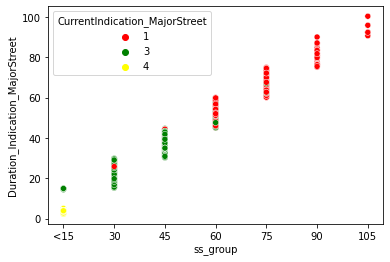

In [29]:
sns.scatterplot(x=df_d_maj["ss_group"],y=df_d_maj["Duration_Indication_MajorStreet"],hue=df_d_maj["CurrentIndication_MajorStreet"],palette=["red","green","yellow"])

-we can see anomly point at 75 for green light